# **Speech to Text using Deep Learning**

In [ ]:
!pip install deepspeech

In [ ]:
!wget https://github.com/mozilla/DeepSpeech/releases/download/v0.9.3/deepspeech-0.9.3-models.pbmm
!wget https://github.com/mozilla/DeepSpeech/releases/download/v0.9.3/deepspeech-0.9.3-models.scorer

## Importing Dependencies

In [1]:
import deepspeech
import wave
import numpy as np
import librosa
import librosa.display
import matplotlib.pyplot as plt
import IPython.display as ipd

## Loading the DeepSpeech Model

In [2]:
# Load the model
model_file_path = '/kaggle/working/deepspeech-0.9.3-models.pbmm'

model = deepspeech.Model(model_file_path)

# Load the scorer
scorer_file_path = '/kaggle/working/deepspeech-0.9.3-models.scorer'
model.enableExternalScorer(scorer_file_path)

TensorFlow: v2.3.0-6-g23ad988
DeepSpeech: v0.9.3-0-gf2e9c85


In [3]:
transcription_file_path = "/kaggle/input/ljspeech/LJSpeech-1.1/metadata.csv"

## Helper Functions

In [4]:
def transcribe_audio_file(audio_file_path):
    
    # Load the audio file
    with wave.open(audio_file_path, 'rb') as audio_file:
        frames = audio_file.readframes(audio_file.getnframes())
        audio = np.frombuffer(frames, dtype=np.int16)

    # Transcribe the audio
    text = model.stt(audio)

    # Find the line that matches the audio file name
    audio_file_name = audio_file_path.split('/')[-1].split('.')[0]
    transcription_line = None
    with open(transcription_file_path, 'r') as f:
        lines = f.readlines()
        for line in lines:
            if audio_file_name in line:
                transcription_line = line
                break

    # Extract the transcription from the line
    if transcription_line is not None:
        transcription = transcription_line.strip().split('|')[1]
    else:
        transcription = 'No transcription found for audio file'

    # Print the transcribed text and original transcription
    print("Transcribed text: ", text)
    print("\nOriginal transcription: ", transcription)

In [5]:
def play_audio_file(audio_file_path):
    
    with wave.open(audio_file_path, 'rb') as audio_file:
        rate = audio_file.getframerate()
        frames = audio_file.readframes(audio_file.getnframes())
        audio = np.frombuffer(frames, dtype=np.int16)
    
    return ipd.display(ipd.Audio(audio, rate=rate))

In [6]:
def show_results(audio_file):
    print("Listen to the original audio file by clicking the play button: \n")
    play_audio_file(audio_file)
    print("Results: \n")
    transcribe_audio_file(audio_file)

In [7]:
def show_graphs(audio_file_path):
    # Load audio file
    audio, rate = librosa.load(audio_file_path)
    
    # Compute the spectrogram
    spectrogram = librosa.stft(audio)
    spectrogram_db = librosa.amplitude_to_db(np.abs(spectrogram))

    # Plot the waveform
    plt.figure(figsize=(10, 5))
    plt.plot(audio)
    plt.title('Waveform')
    plt.xlabel('Time (s)')
    plt.ylabel('Amplitude')
    plt.show()

    # Plot the spectrogram
    plt.figure(figsize=(10, 5))
    librosa.display.specshow(spectrogram_db, sr=rate, x_axis='time', y_axis='hz', cmap='plasma')
    plt.colorbar(format='%+2.0f dB')
    plt.title('Spectrogram')
    plt.show()

## Testing out the model

In [28]:
audio_file = "/kaggle/input/ljspeech/LJSpeech-1.1/wavs/LJ003-0186.wav"

In [29]:
show_results(audio_file)

Listen to the original audio file by clicking the play button: 



Results: 

Transcribed text:  only when the order of execution came down were those about to suffer placed a part in one of the rooms in the arcade of the middle ward

Original transcription:  Only when the order of execution came down were those about to suffer placed apart in one of the rooms in the arcade of the middle ward.


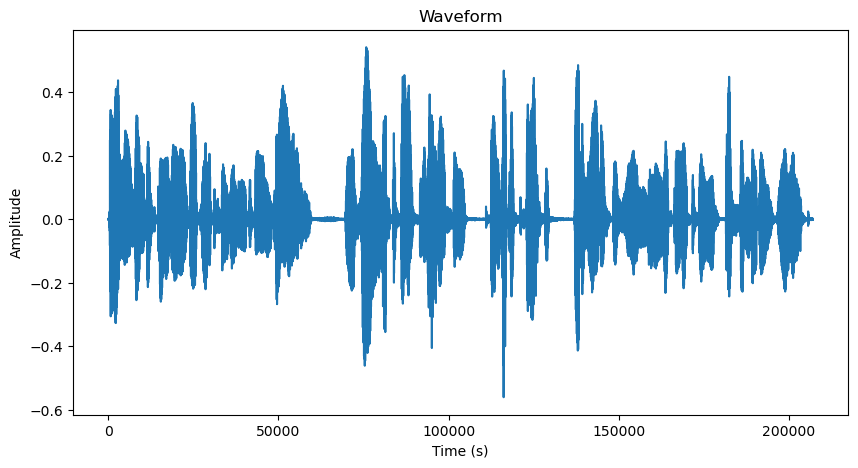

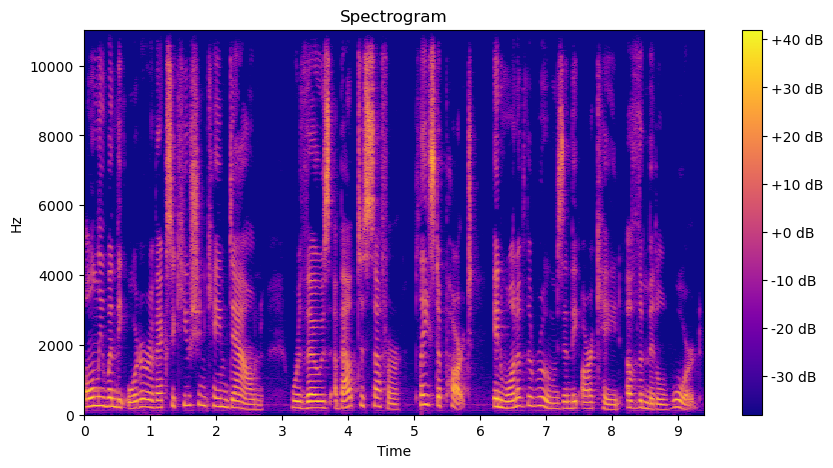

In [30]:
show_graphs(audio_file)

In [36]:
audio_file_2 = "/kaggle/input/ljspeech/LJSpeech-1.1/wavs/LJ003-0176.wav"

In [37]:
show_results(audio_file_2)

Listen to the original audio file by clicking the play button: 



Results: 

Transcribed text:  mister cobbett was also a larger of mister newman's and so were any members of the aristocracy

Original transcription:  Mr. Cobbett was also a lodger of Mr. Newman's; and so were any members of the aristocracy,


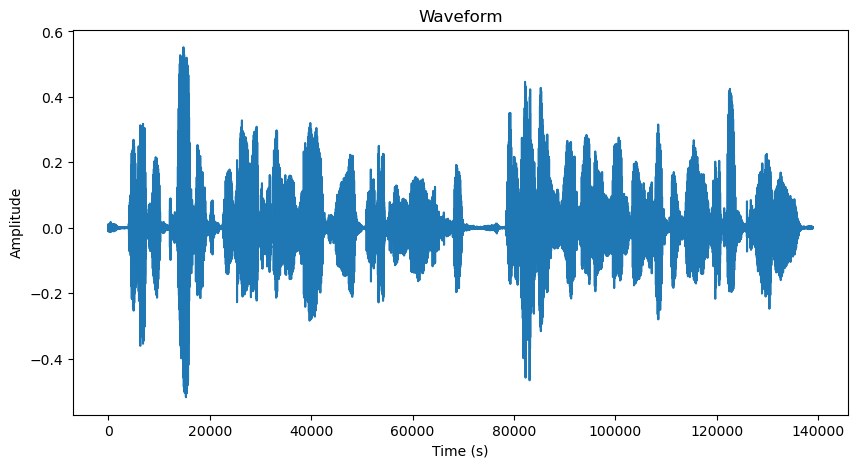

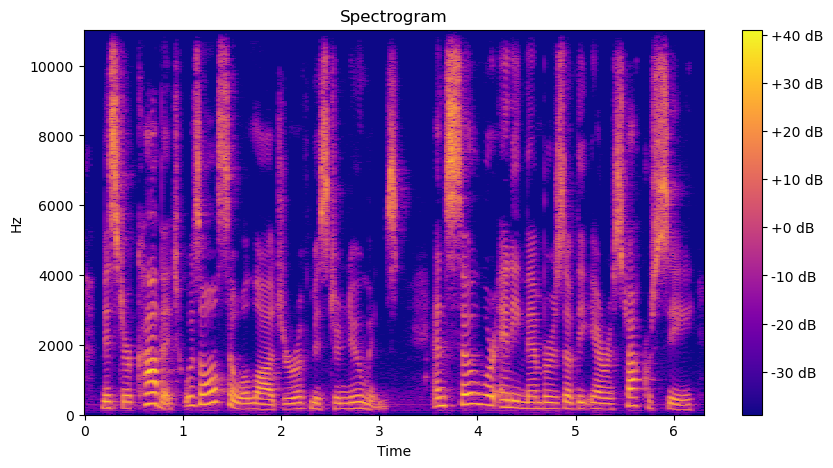

In [38]:
show_graphs(audio_file_2)